# Ejercicio de programación Regresión Lineal

In [54]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Datasets/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [55]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('dab.csv'), delimiter=';')
X, y = data[:, :8], data[:, 8]

m = y.size  # m = numero de ejemplos de entrenamiento

In [56]:
print(X)
print(y)
print(m)

[[5.0000000e+00 6.0620190e+06 2.0000000e+00 ... 1.7300000e+03
  4.2500000e+02 1.0000000e+00]
 [4.0000000e+00 1.2052019e+07 3.0000000e+00 ... 6.2000000e+02
  1.0200000e+03 1.0000000e+00]
 [5.0000000e+00 2.1052019e+07 2.0000000e+00 ... 1.9150000e+03
  1.9000000e+03 1.0000000e+00]
 ...
 [5.0000000e+00 2.1032019e+07 4.0000000e+00 ... 1.0200000e+03
  1.1500000e+03 0.0000000e+00]
 [6.0000000e+00 2.7062019e+07 2.0000000e+00 ... 1.7000000e+03
  1.3000000e+02 1.0000000e+00]
 [8.0000000e+00 2.4032019e+07 1.0000000e+00 ... 9.5000000e+02
  1.2350000e+03 0.0000000e+00]]
[1.055e+03 4.000e+00 2.345e+03 1.300e+01 2.500e+02 1.820e+03 1.550e+02
 5.150e+02 2.450e+02 6.500e+01 2.855e+03 9.200e+02 1.015e+03 4.400e+02
 1.720e+03 1.050e+03 9.150e+02 1.215e+03 9.100e+02 9.200e+02 1.450e+03
 1.450e+02 1.135e+03 1.330e+03 2.500e+02 1.225e+03 2.300e+02 2.530e+03
 1.925e+03 7.000e+00 2.300e+02 1.140e+03 7.500e+01 3.000e+00 1.250e+02
 2.400e+02 1.250e+02 6.500e+01 1.750e+02 1.040e+03 2.300e+02 1.230e+03
 1.300e+02

### 1.1 Trazar los datos

In [20]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


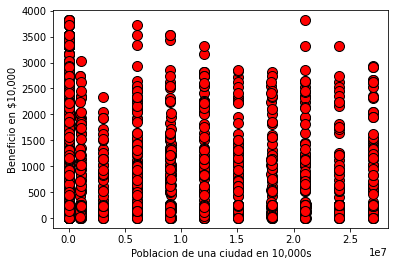

In [57]:
plotData(X, y)

In [58]:
?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [59]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1])
  sigma = np.zeros(X.shape[1])

  mu = np.mean(X, axis=0)
  sigma = np.std(X,axis=0)
  X_norm = (X - mu)/ sigma
  return X_norm, mu, sigma

In [60]:
x_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media: ', mu)
print('Desviacion: ', sigma)
print(x_norm)

[[5.0000000e+00 6.0620190e+06 2.0000000e+00 ... 1.7300000e+03
  4.2500000e+02 1.0000000e+00]
 [4.0000000e+00 1.2052019e+07 3.0000000e+00 ... 6.2000000e+02
  1.0200000e+03 1.0000000e+00]
 [5.0000000e+00 2.1052019e+07 2.0000000e+00 ... 1.9150000e+03
  1.9000000e+03 1.0000000e+00]
 ...
 [5.0000000e+00 2.1032019e+07 4.0000000e+00 ... 1.0200000e+03
  1.1500000e+03 0.0000000e+00]
 [6.0000000e+00 2.7062019e+07 2.0000000e+00 ... 1.7000000e+03
  1.3000000e+02 1.0000000e+00]
 [8.0000000e+00 2.4032019e+07 1.0000000e+00 ... 9.5000000e+02
  1.2350000e+03 0.0000000e+00]]
Media:  [4.59459459e+00 1.34030600e+07 2.27827828e+00 3.43943944e+00
 3.95465465e+01 1.27149650e+03 1.38795095e+03 8.46846847e-01]
Desviacion:  [1.73488346e+00 8.10600702e+06 9.68285193e-01 1.82302208e+00
 1.97774299e+01 5.66010119e+02 7.01058454e+02 6.72324019e-01]
[[ 0.23367875 -0.90562974 -0.28739289 ...  0.81006238 -1.37356728
   0.22779664]
 [-0.34272884 -0.16667159  0.74536069 ... -1.1510333  -0.5248506
   0.22779664]
 [ 0.233

In [61]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.concatenate([np.ones((m, 1)), x_norm], axis=1)

In [62]:
print(X)

[[ 1.          0.23367875 -0.90562974 ...  0.81006238 -1.37356728
   0.22779664]
 [ 1.         -0.34272884 -0.16667159 ... -1.1510333  -0.5248506
   0.22779664]
 [ 1.          0.23367875  0.94361613 ...  1.13691166  0.73039423
   0.22779664]
 ...
 [ 1.          0.23367875  0.94114882 ... -0.44433216 -0.33941671
  -1.25958143]
 [ 1.          0.81008635  1.68504159 ...  0.75705979 -1.79435958
   0.22779664]
 [ 1.          1.96290153  1.31124473 ... -0.56800486 -0.21817147
  -1.25958143]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [63]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [42]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

ValueError: ignored

<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [64]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [65]:
# inicializa los parametros de ajuste
theta = np.zeros(9)

# configuraciones para el descenso por el gradiente
iterations = 15000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

211148.5695532339
Theta encontrada por descenso gradiente: 867.5636, 3.4818
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

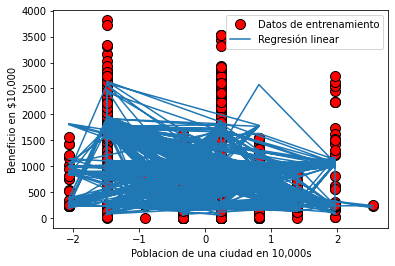

In [66]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [68]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 4, 1052019, 3, 1,40, 1515, 2030, 1], theta)
print('Para una un vuelo de las caracteristicas dadas, se predice una duracion de {:.2f}\n'.format(predict1*10000))



Para una un vuelo de las caracteristicas dadas, se predice una duracion de 124970240848.16



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

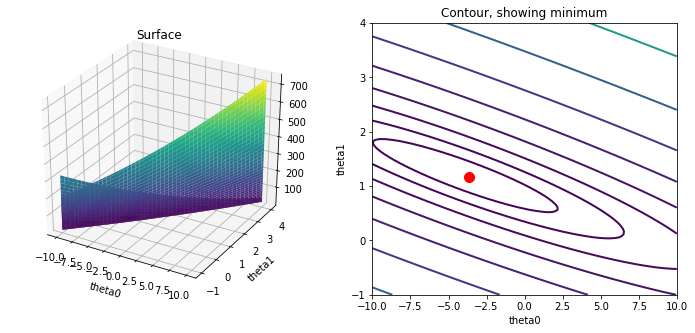

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass